In [43]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(10000)*0.1
n = 20
x = np.zeros([len(t),n])
for i in range(n):
    x[:,i] = np.sin(t + np.pi/4*i) #phase shift each x by n
    
# Calculate the phase gradient 
from scipy.signal import hilbert 

analytic_signal = hilbert(x[15,:])
instantaneous_phase = np.angle(analytic_signal)  # phase at each time
print(instantaneous_phase)

phase_gradient = np.gradient(instantaneous_phase)
print('phase gradient', phase_gradient)

unwrapped_phase = np.unwrap(instantaneous_phase)

# Option 1: Compute gradient and sum it
dx = 1  # spatial step size
phase_gradient = np.gradient(unwrapped_phase, dx)
total_phase_shift = np.sum(phase_gradient)
print(total_phase_shift/np.pi)

[-0.51684466  0.83260341  1.49352514  2.22568772  3.10557029 -2.46789324
 -1.64005099 -0.84435759 -0.09001875  0.70430124  1.49851415  2.31744573
  3.09615914 -2.3626322  -1.63915801 -0.94922512 -0.12924277  0.42295865
  1.48945421 -2.62474799]
phase gradient [ 1.34944807  1.0051849   0.69654215  0.80602257 -2.34679048 -2.37281064
  0.81176782  0.77501612  0.77432942  0.79426645  0.80657224  0.79882249
 -2.34003896 -2.36765857  0.70670354  0.75495762  0.68609189  0.80934849
 -1.52385332 -4.1142022 ]
5.88900924514885


(20,)
Total Phase Shift: 18.66 rad
Total Phase Shift in pi units: 5.94 π
Expected: 14.92 rad = 4.75 π
Begin - end unwrapped phase: 5.33 pi


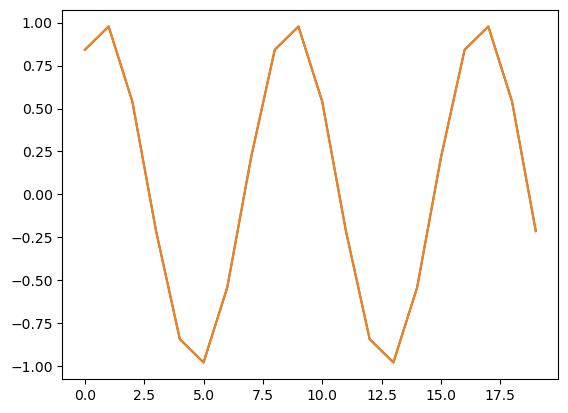

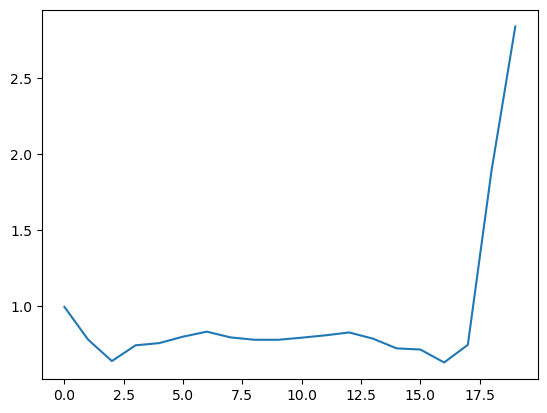

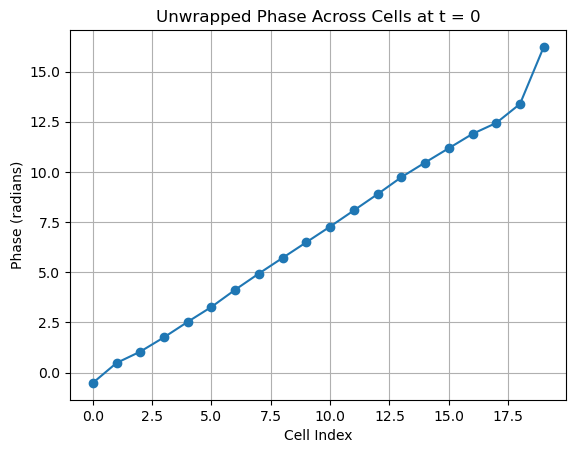

In [46]:
# Take a snapshot in time (e.g., t = 0)
snapshot = x[10, :]  # signal across cells at t = 0

# Use Hilbert transform to get spatial phase at that time point
analytic_signal = hilbert(snapshot)
instantaneous_phase = np.angle(analytic_signal)
unwrapped_phase = np.unwrap(instantaneous_phase)

for i in range(n):
    if unwrapped_phase[i] < 0:
        unwrapped_phase *= -1

plt.figure()
plt.plot(snapshot)
plt.plot(analytic_signal)

# Compute spatial gradient
dx = 1
phase_gradient = np.gradient(unwrapped_phase, dx)
print(phase_gradient.shape)
plt.figure()
plt.plot(phase_gradient)
# Compute total phase shift across all cells
total_phase_shift = np.sum(phase_gradient)

print(f"Total Phase Shift: {total_phase_shift:.2f} rad")
print(f"Total Phase Shift in pi units: {total_phase_shift/np.pi:.2f} π")
print(f"Expected: {(n-1)*(np.pi/4):.2f} rad = {(n-1)/4:.2f} π")
print(f'Begin - end unwrapped phase: {(unwrapped_phase[-1]-unwrapped_phase[0])/np.pi:.2f} pi')
# Plot
plt.figure()
plt.plot(unwrapped_phase, marker='o')
plt.title("Unwrapped Phase Across Cells at t = 0")
plt.xlabel("Cell Index")
plt.ylabel("Phase (radians)")
plt.grid(True)
plt.show()

In [52]:
from scipy.signal import find_peaks

# Store peak times for each cell
first_peak_times = np.zeros(n)

for i in range(n):
    signal = x[:, i]

    # Find peaks
    peaks, _ = find_peaks(signal, distance=20)  # adjust `distance` as needed

    if len(peaks) > 0:
        first_peak_times[i] = t[peaks[0]]
    else:
        first_peak_times[i] = np.nan  # or handle missing peaks

# Estimate period from one representative cell (or global average if needed)
ref_peaks, _ = find_peaks(x[:, 0], distance=20)
ref_periods = np.diff(t[ref_peaks])
mean_period = np.mean(ref_periods)

# Calculate time differences
time_diffs = first_peak_times - first_peak_times[0]

# Convert to phase: φ = Δt / T * 2π (accumulates!)
phase_shifts = time_diffs / mean_period * 2 * np.pi

# Now accumulate the phase shift (additive)
accumulated_phase_shift = np.cumsum(phase_shifts)  # cumulative sum across cells

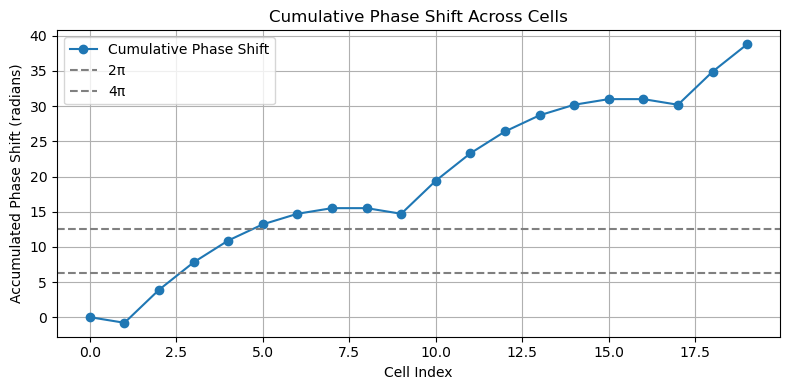

Total Accumulated Phase Shift: 38.80 rad ≈ 12.35 π


In [53]:
plt.figure(figsize=(8, 4))
plt.plot(accumulated_phase_shift, marker='o', label='Cumulative Phase Shift')
plt.axhline(2*np.pi, color='gray', linestyle='--', label='2π')
plt.axhline(4*np.pi, color='gray', linestyle='--', label='4π')
plt.xlabel("Cell Index")
plt.ylabel("Accumulated Phase Shift (radians)")
plt.title("Cumulative Phase Shift Across Cells")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print the total accumulated phase shift
total_phase_shift = accumulated_phase_shift[-1]
print(f"Total Accumulated Phase Shift: {total_phase_shift:.2f} rad ≈ {total_phase_shift/np.pi:.2f} π")

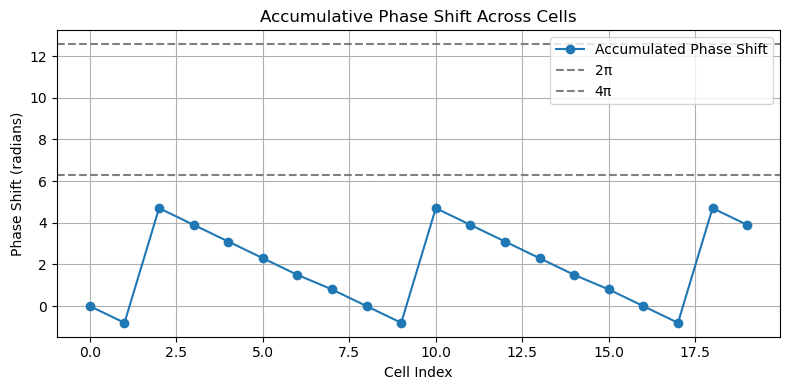

Total Phase Shift: 3.90 rad ≈ 1.24 π


In [50]:
plt.figure(figsize=(8, 4))
plt.plot(phase_shifts, marker='o', label='Accumulated Phase Shift')
plt.axhline(2*np.pi, color='gray', linestyle='--', label='2π')
plt.axhline(4*np.pi, color='gray', linestyle='--', label='4π')
plt.xlabel("Cell Index")
plt.ylabel("Phase Shift (radians)")
plt.title("Accumulative Phase Shift Across Cells")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Total Phase Shift: {phase_shifts[-1]:.2f} rad ≈ {phase_shifts[-1]/np.pi:.2f} π")

Total phase shift: 3.90 rad ≈ 1.24 π


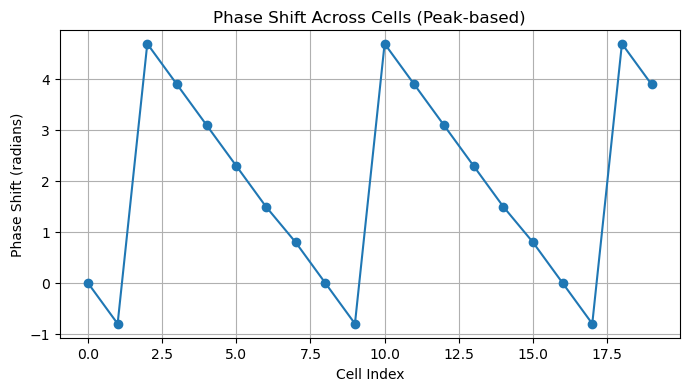

In [48]:
plt.figure(figsize=(8, 4))
plt.plot(phase_shifts, marker='o')
plt.title("Phase Shift Across Cells (Peak-based)")
plt.xlabel("Cell Index")
plt.ylabel("Phase Shift (radians)")
plt.grid(True)

# Also show total phase shift
total_shift = phase_shifts[-1] - phase_shifts[0]
print(f"Total phase shift: {total_shift:.2f} rad ≈ {total_shift / np.pi:.2f} π")